In [1]:
import pandas as pd

path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"
cancer_data = pd.read_csv(path)

# print(cancer_data.describe())

cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})
cancer_data=cancer_data.drop('id', axis=1)

correlations = cancer_data.drop('diagnosis', axis=1).corr()
 
correlations.to_csv('correlation_matrix.csv', index=True)

print("Correlation Matrix saved to 'correlation_matrix.csv'.")


Correlation Matrix saved to 'correlation_matrix.csv'.


In [2]:
import pandas as pd

path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"
cancer_data = pd.read_csv(path)

cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

cancer_data=cancer_data.drop('id', axis=1)

correlations = cancer_data.drop('diagnosis', axis=1).corr()

threshold = 0.7

highly_correlated_features = set()
for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > threshold:
            feature_i = correlations.columns[i]
            feature_j = correlations.index[j]
            highly_correlated_features.add((feature_i, feature_j, correlations.iloc[i, j]))

highly_correlated_features = sorted(highly_correlated_features, key=lambda x: abs(x[2]), reverse=True)

print("Highly Correlated Features:")
for feature_i, feature_j, correlation_coefficient in highly_correlated_features:
    print(f"{feature_i} - {feature_j}: {correlation_coefficient:.4f}")


Highly Correlated Features:
perimeter_mean - radius_mean: 0.9979
perimeter_worst - radius_worst: 0.9937
area_mean - radius_mean: 0.9874
area_mean - perimeter_mean: 0.9865
area_worst - radius_worst: 0.9840
area_worst - perimeter_worst: 0.9776
perimeter_se - radius_se: 0.9728
perimeter_worst - perimeter_mean: 0.9704
radius_worst - radius_mean: 0.9695
radius_worst - perimeter_mean: 0.9695
perimeter_worst - radius_mean: 0.9651
radius_worst - area_mean: 0.9627
area_worst - area_mean: 0.9592
perimeter_worst - area_mean: 0.9591
area_se - radius_se: 0.9518
area_worst - perimeter_mean: 0.9415
area_worst - radius_mean: 0.9411
area_se - perimeter_se: 0.9377
concave points_mean - concavity_mean: 0.9214
texture_worst - texture_mean: 0.9120
concave points_worst - concave points_mean: 0.9102
concavity_worst - compactness_worst: 0.8923
concavity_worst - concavity_mean: 0.8841
concavity_mean - compactness_mean: 0.8831
compactness_worst - compactness_mean: 0.8658
concave points_worst - concavity_mean: 0

In [3]:
correlation_matrix = cancer_data[['perimeter_mean', 'radius_mean', 'area_mean', 
                                  'perimeter_worst', 'radius_worst', 'area_worst', 
                                  'concavity_mean', 'compactness_mean', 
                                  'concave points_mean', 'diagnosis']].corr()

print(correlation_matrix['diagnosis'])

cancer_data['perimeter_area_ratio'] = cancer_data['perimeter_mean'] / cancer_data['area_mean']
cancer_data['radius_area_ratio'] = cancer_data['radius_mean'] / cancer_data['area_mean']
cancer_data['perimeter_worst_area_ratio'] = cancer_data['perimeter_worst'] / cancer_data['area_worst']
cancer_data['radius_worst_area_ratio'] = cancer_data['radius_worst'] / cancer_data['area_worst']
cancer_data['concavity_compactness_ratio'] = cancer_data['concavity_mean'] / cancer_data['compactness_mean']
cancer_data['concave_points_perimeter_ratio'] = cancer_data['concave points_mean'] / cancer_data['perimeter_mean']

print(cancer_data.head())

correlation_with_diagnosis = cancer_data[['perimeter_area_ratio', 'radius_area_ratio', 
                                          'perimeter_worst_area_ratio', 'radius_worst_area_ratio', 
                                          'concavity_compactness_ratio', 'concave_points_perimeter_ratio', 
                                          'diagnosis']].corr()

print(correlation_with_diagnosis['diagnosis'])

cancer_data.to_csv('cancer_data_After_correlation.csv', index=True)

perimeter_mean         0.742636
radius_mean            0.730029
area_mean              0.708984
perimeter_worst        0.782914
radius_worst           0.776454
area_worst             0.733825
concavity_mean         0.696360
compactness_mean       0.596534
concave points_mean    0.776614
diagnosis              1.000000
Name: diagnosis, dtype: float64
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017

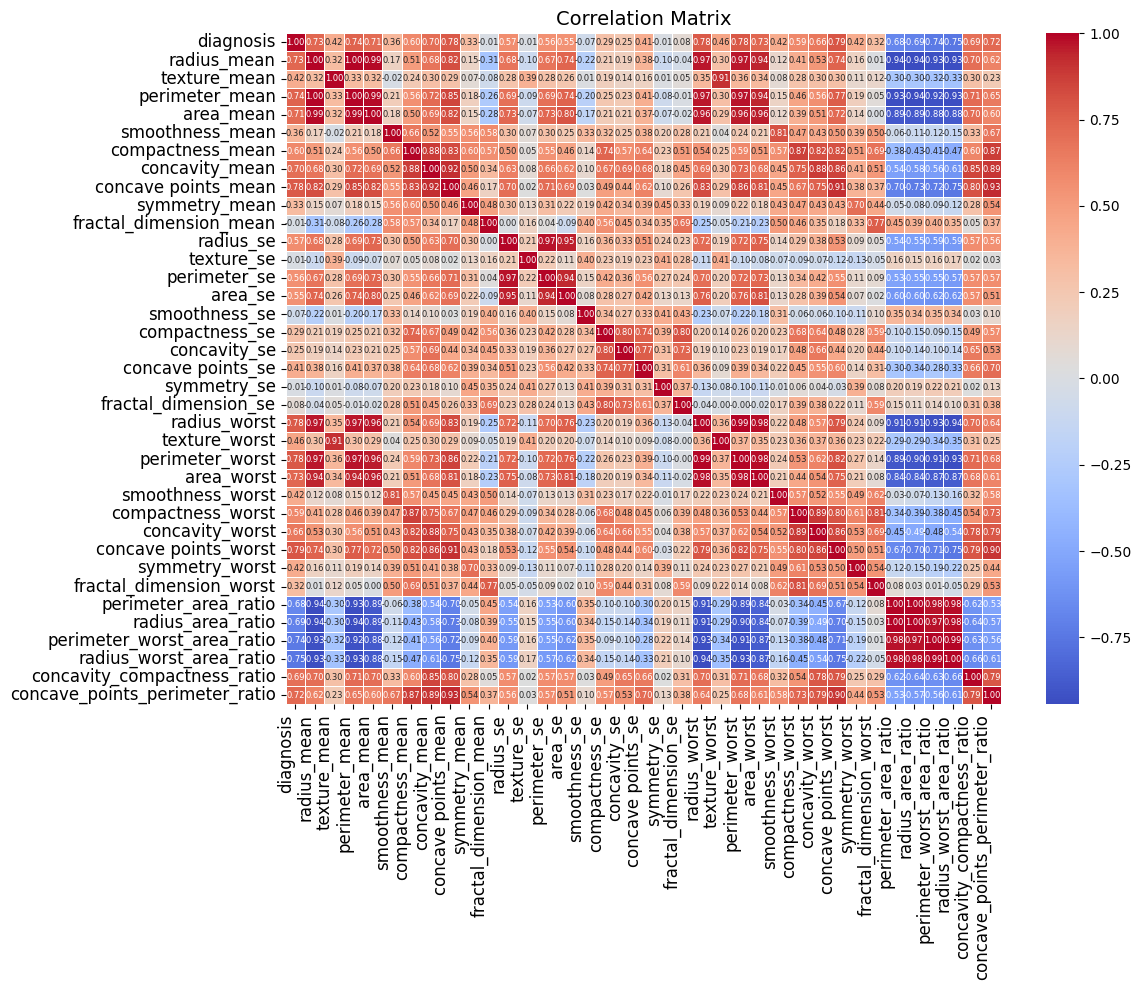

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"
# cancer_data = pd.read_csv(path)

# cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})
# cancer_data = cancer_data.drop('id', axis=1)

correlations = cancer_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 6})
plt.xticks(ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

# # Plotting the correlation matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

In [5]:
import pandas as pd
from tabulate import tabulate

df = cancer_data[['perimeter_area_ratio', 'radius_area_ratio', 'perimeter_worst_area_ratio', 'radius_worst_area_ratio', 'concavity_compactness_ratio', 'concave_points_perimeter_ratio']]

# Getting the summary statistics
summary_stats = df.describe()

# Transposing the summary statistics for a better view
summary_stats = summary_stats.transpose()

# Selecting only the columns of interest
summary_stats = summary_stats[['mean', 'std', 'min', 'max']]

# Combining min and max into the same column
summary_stats['Min-Max'] = summary_stats['min'].astype(str) + '-' + summary_stats['max'].astype(str)

# Dropping min and max columns
summary_stats.drop(columns=['min', 'max'], inplace=True)

# Convert summary_stats to a list of lists for tabulate
table = summary_stats.reset_index().values.tolist()

# Get the headers for the table
headers = ['Feature', 'Mean', 'Std', 'Min-Max']

# Print the table
print(tabulate(table, headers=headers, tablefmt="line"))

# Save to Excel file with headers
summary_stats.to_excel("summary_statistics_with_headers.xlsx")


Feature                                Mean          Std  Min-Max
------------------------------  -----------  -----------  ----------------------------------------
perimeter_area_ratio            0.157657     0.0361978    0.07473010795681728-0.3051567944250871
radius_area_ratio               0.0243624    0.00585738   0.01096361455417833-0.048648083623693376
perimeter_worst_area_ratio      0.142254     0.036272     0.05905030559473436-0.27219222462203024
radius_worst_area_ratio         0.0217309    0.0057658    0.00847202632816173-0.04281857451403888
concavity_compactness_ratio     0.728389     0.403052     0.0-2.569105691056911
concave_points_perimeter_ratio  0.000482305  0.000288132  0.0-0.0013560195926785254


In [6]:
r={}
ca={}
c={}

Class distribution after SMOTE:
0    249
1    249
Name: diagnosis, dtype: int64
CatBoostClassifier:
Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



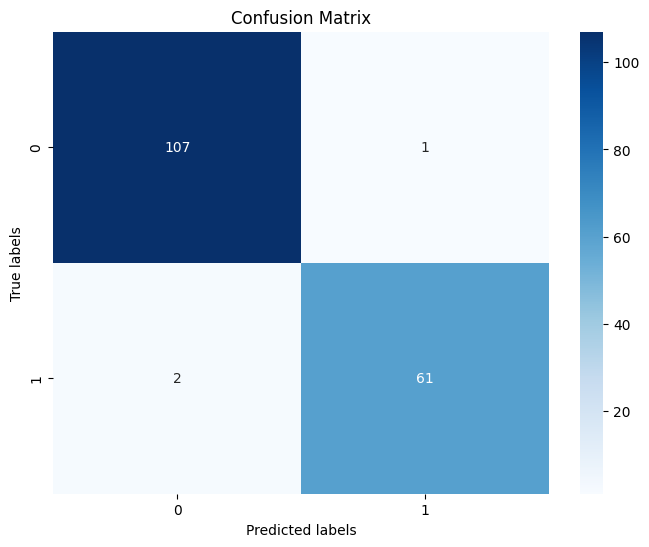

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"
# cancer_data = pd.read_csv(path)

# cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

X = cancer_data.drop('diagnosis', axis=1)
y = cancer_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
catboost_model.fit(X_train_smote, y_train_smote)

y_pred = catboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('CatBoostClassifier:')
print("Accuracy:", accuracy)
r['CatBoostClassifier']=accuracy
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test, y_pred)
ca['class_report_CBC']=class_report
c['conf_mat_CBC']=conf_mat

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Class distribution after SMOTE:
0    249
1    249
Name: diagnosis, dtype: int64
Logistic Regression with LDA :
Accuracy: 0.9707602339181286

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



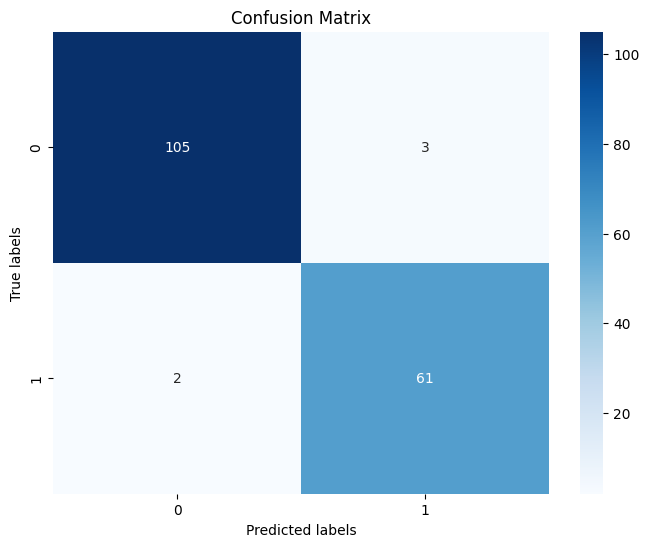

In [8]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"
# cancer_data = pd.read_csv(path)

# cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})
X = cancer_data.drop('diagnosis', axis=1)
y = cancer_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_smote, y_train_smote)
X_test_lda = lda.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_lda, y_train_smote)

y_pred = log_reg.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression with LDA :')
print("Accuracy:", accuracy)
r['Logistic Regression with LDA']=accuracy
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
ca['class_report_LDA']=class_report
c['conf_mat_LDA']=conf_mat

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Class distribution after SMOTE:
0    249
1    249
Name: diagnosis, dtype: int64
ExtraTreesClassifier:
Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



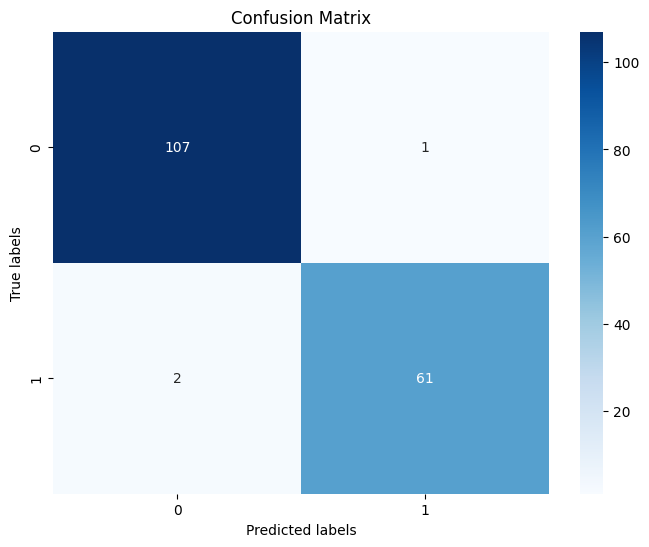

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"
# cancer_data = pd.read_csv(path)

# cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

X = cancer_data.drop('diagnosis', axis=1)
y = cancer_data['diagnosis']

num_train_samples = 398
num_test_samples = 171

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_train_samples, test_size=num_test_samples, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train_resampled, y_train_resampled)

y_pred = et_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('ExtraTreesClassifier:')
print("Accuracy:", accuracy)
r['ExtraTreesClassifier']=accuracy
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test, y_pred)
ca['class_report_ETC']=class_report
c['conf_mat_ETC']=conf_mat

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Class distribution after SMOTE:
0    249
1    249
Name: diagnosis, dtype: int64
RidgeClassifier:
Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



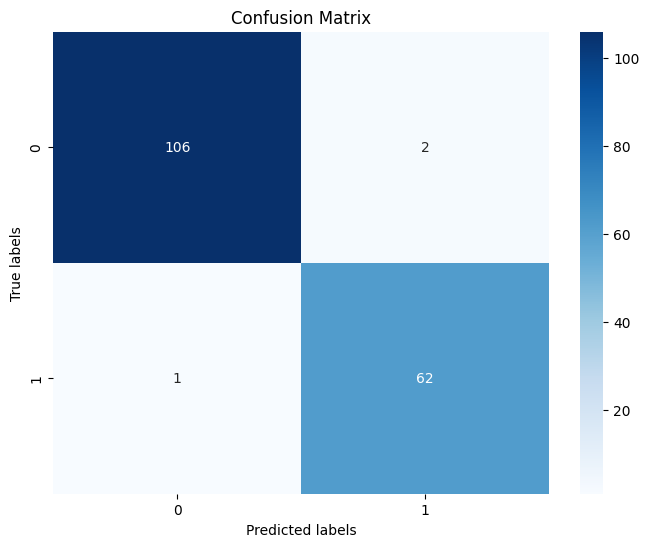

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import RidgeClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"
# cancer_data = pd.read_csv(path)

# cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

X = cancer_data.drop('diagnosis', axis=1)
y = cancer_data['diagnosis']

num_train_samples = 398
num_test_samples = 171

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_train_samples, test_size=num_test_samples, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

ridge_model = RidgeClassifier(alpha=0.1) 
ridge_model.fit(X_train_resampled, y_train_resampled)

y_pred = ridge_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('RidgeClassifier:')
print("Accuracy:", accuracy)
r['RidgeClassifier']=accuracy
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test, y_pred)

ca['class_report_RC']=class_report
c['conf_mat_RC']=conf_mat

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [11]:
print(r)

{'CatBoostClassifier': 0.9824561403508771, 'Logistic Regression with LDA': 0.9707602339181286, 'ExtraTreesClassifier': 0.9824561403508771, 'RidgeClassifier': 0.9824561403508771}


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

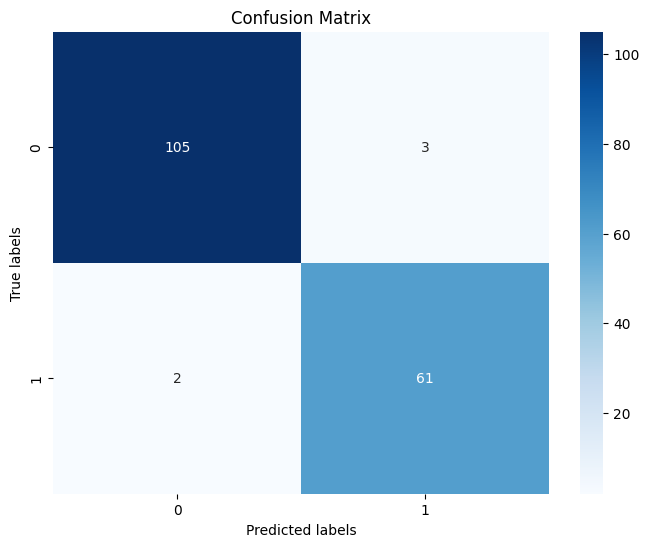

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"
# cancer_data = pd.read_csv(path)

# cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

X = cancer_data.drop('diagnosis', axis=1)
y = cancer_data['diagnosis']

num_train_samples = 398
num_test_samples = 171

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_train_samples, test_size=num_test_samples, random_state=42)

lgbm_model = LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=6,num_leaves=31,verbose=0)

lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('LGBMClassifier:')
print("Accuracy:", accuracy)
r['LGBMClassifier']=accuracy


class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test, y_pred)

ca['class_report_LGBM']=class_report
c['conf_mat_LGBM']=conf_mat

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [13:59:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


xgb:
Accuracy: 0.9766081871345029

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



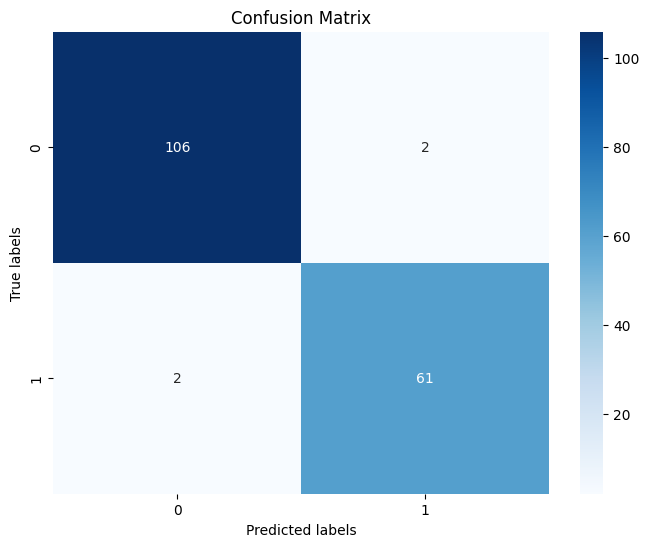

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"
# cancer_data = pd.read_csv(path)

# cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

X = cancer_data.drop('diagnosis', axis=1)
y = cancer_data['diagnosis']

num_train_samples = 398
num_test_samples = 171

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_train_samples, test_size=num_test_samples, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'silent': True
}

num_rounds = 1000
xgb_model = xgb.train(params, dtrain, num_rounds)

y_pred = xgb_model.predict(dtest)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
print('xgb:')
print("Accuracy:", accuracy)
r['xgb']=accuracy

class_report = classification_report(y_test, y_pred_binary)
print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test, y_pred_binary)

ca['class_report_XGB']=class_report
c['conf_mat_XGB']=conf_mat

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


RandomForestClassifier:
Accuracy: 0.9707602339181286

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



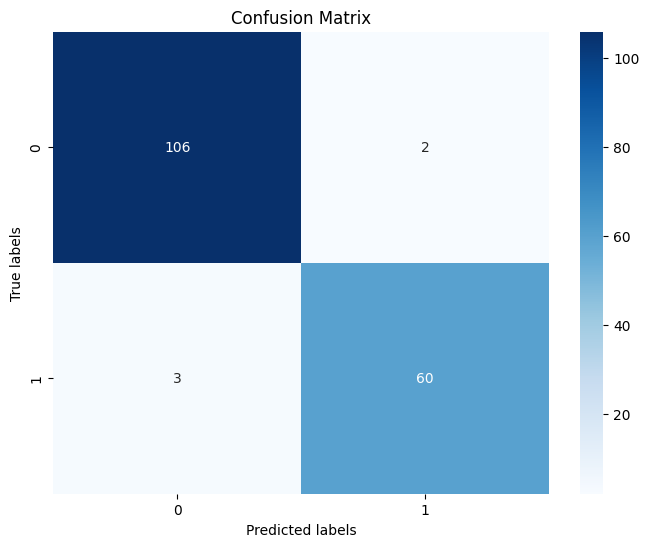

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"
# cancer_data = pd.read_csv(path)

# cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

X = cancer_data.drop('diagnosis', axis=1)
y = cancer_data['diagnosis']

num_train_samples = 398
num_test_samples = 171

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_train_samples, test_size=num_test_samples, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('RandomForestClassifier:')
print("Accuracy:", accuracy)
r['RandomForestClassifier']=accuracy

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test, y_pred)

ca['class_report_RFC']=class_report
c['conf_mat_RFC']=conf_mat

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Class distribution after SMOTE:
0    249
1    249
Name: diagnosis, dtype: int64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 249, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5996
[LightGBM] [Info] Number of data points in the train set: 498, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

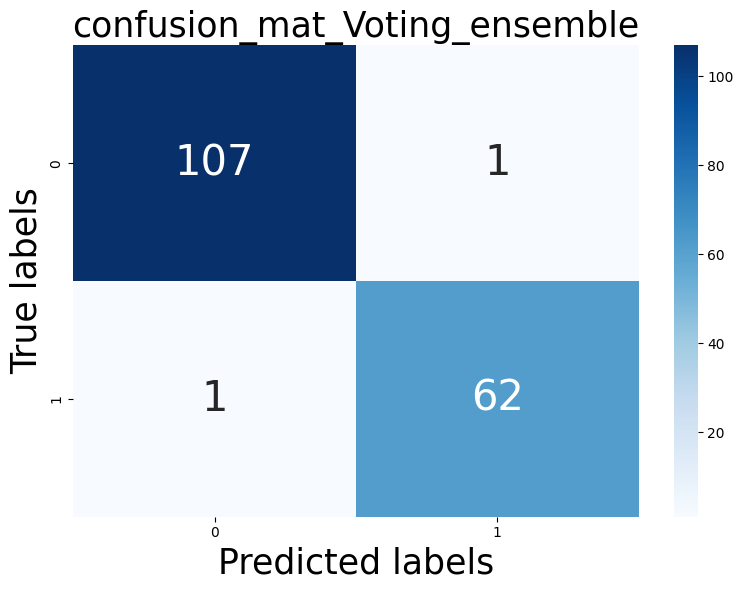

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X = cancer_data.drop('diagnosis', axis=1)
y = cancer_data['diagnosis']

num_train_samples = 398
num_test_samples = 171

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_train_samples, test_size=num_test_samples, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

lda_model = LinearDiscriminantAnalysis()
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.2, depth=6, verbose=0)
lgbm_model = LGBMClassifier()
et_model = ExtraTreesClassifier()
ridge_model = RidgeClassifier(alpha=0.1)
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

ensemble_clf = VotingClassifier(
    estimators=[
        ('Linear Discriminant Analysis', lda_model),
        ('CatBoost', catboost_model),
        ('LGBM', lgbm_model),
        ('Extra Trees', et_model),
        ('Ridge Classifier', ridge_model),
        ('Random Forest', rf_model),
        ('XGBoost', xgb_model)
    ],
    voting='hard'
)

ensemble_clf.fit(X_train_resampled, y_train_resampled)
ensemble_pred = ensemble_clf.predict(X_test)

print()
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Classifier Accuracy:", ensemble_accuracy)
r['Ensemble Classifier Accuracy']=ensemble_accuracy


ensemble_class_report = classification_report(y_test, ensemble_pred)
print("Ensemble Classifier Classification Report:")
print(ensemble_class_report)

conf_mat = confusion_matrix(y_test, ensemble_pred)

ca['class_report_ensemble']=class_report
# c['conf_mat_ensemble']=conf_mat

fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figsize as needed

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={"fontsize":30})
ax.set_xlabel('Predicted labels', fontsize=25)
ax.set_ylabel('True labels', fontsize=25)
ax.set_title('confusion_mat_Voting_ensemble', fontsize=25)

plt.tight_layout()
plt.show()



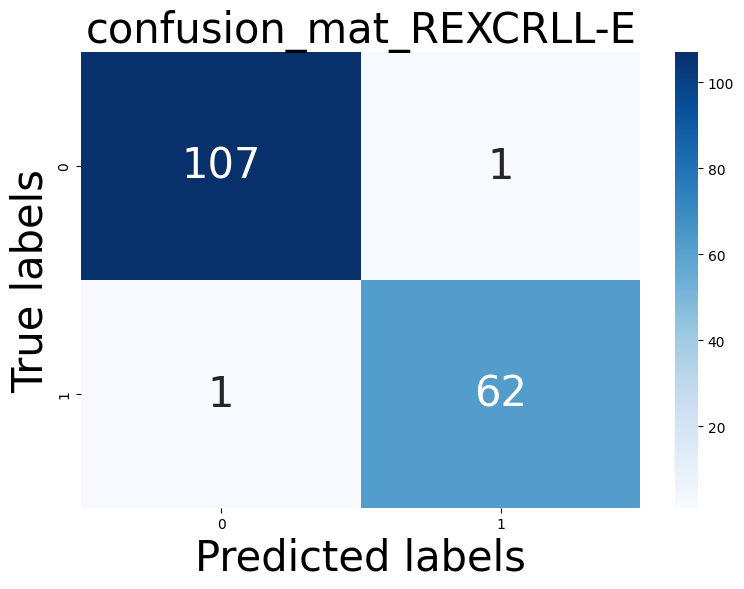

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figsize as needed

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={"fontsize":30})
ax.set_xlabel('Predicted labels', fontsize=30)
ax.set_ylabel('True labels', fontsize=30)
ax.set_title('confusion_mat_REXCRLL-E', fontsize=30)

plt.tight_layout()
plt.show()

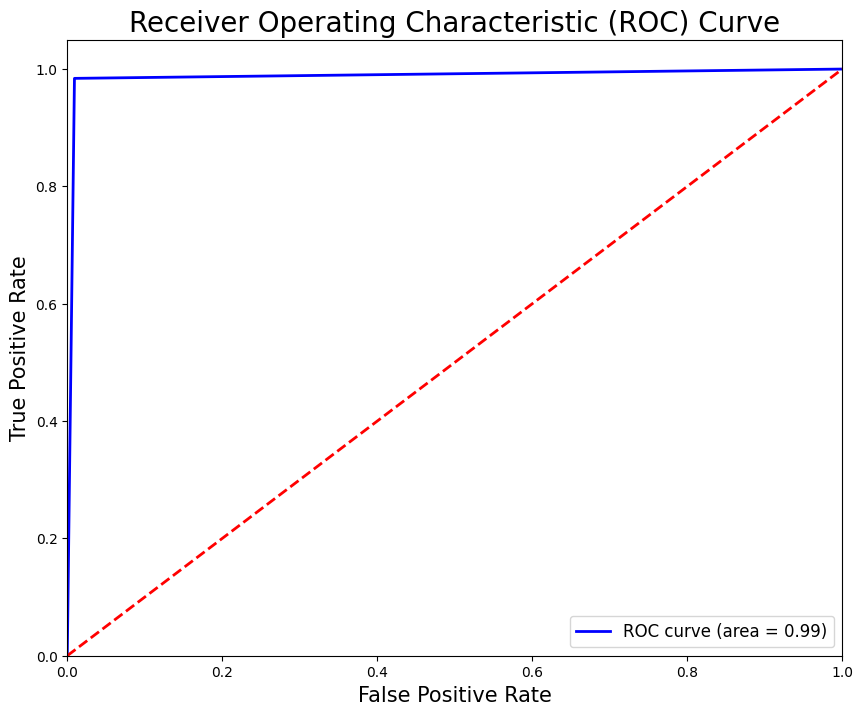

In [18]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
plt.legend(loc="lower right", fontsize=12)
plt.show()


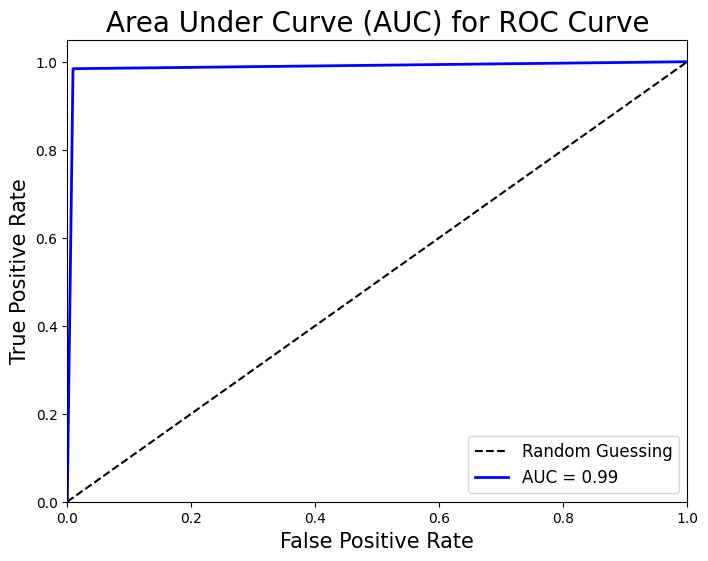

In [20]:
# Plot AUC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc, color='blue', lw=2)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Area Under Curve (AUC) for ROC Curve', fontsize=20)
plt.legend(loc='lower right', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


In [ ]:
#random sample input
import pandas as pd

path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"
cancer_data = pd.read_csv(path)

cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

cancer_data['perimeter_area_ratio'] = cancer_data['perimeter_mean'] / cancer_data['area_mean']
cancer_data['radius_area_ratio'] = cancer_data['radius_mean'] / cancer_data['area_mean']
cancer_data['perimeter_worst_area_ratio'] = cancer_data['perimeter_worst'] / cancer_data['area_worst']
cancer_data['radius_worst_area_ratio'] = cancer_data['radius_worst'] / cancer_data['area_worst']
cancer_data['concavity_compactness_ratio'] = cancer_data['concavity_mean'] / cancer_data['compactness_mean']
cancer_data['concave_points_perimeter_ratio'] = cancer_data['concave points_mean'] / cancer_data['perimeter_mean']

random_sample = cancer_data.sample(n=100) 
print(random_sample)

X_test = random_sample.drop(columns=['diagnosis','id'])

predictions = ensemble_clf.predict(X_test)
random_sample['Predicted_diagnosis'] = predictions

actual_labels = random_sample['diagnosis']
predicted_labels = random_sample['Predicted_diagnosis']
accuracy = accuracy_score(actual_labels, predicted_labels)

random_sample['diagnosis'] = random_sample['diagnosis'].map({1: 'M', 0: 'B'})
random_sample['Predicted_diagnosis'] = random_sample['Predicted_diagnosis'].map({1: 'M', 0: 'B'})


print(random_sample[['diagnosis', 'Predicted_diagnosis']])

print("Accuracy for the random samples: {:.2f}%".format(accuracy * 100))


In [ ]:
m=['CBC','LDA','ETC','RC','LGBM','XGB','RFC','REXCRLL-E']

In [ ]:
for i in r:
    print(i,':',r[i])

In [ ]:
models = m
accuracies = list(r.values())
plt.figure(figsize=(20, 8))
plt.scatter(models, accuracies, color='blue',)
plt.plot(models, accuracies, color='red',)
plt.xlabel('Model',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Model Comparison',fontsize=20)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

models = m
accuracies = list(r.values())

plt.figure(figsize=(25, 15))

plt.scatter(models, accuracies, color='blue', s=100)

plt.plot(models, accuracies, color='red')

for i in range(len(models)):
    plt.text(models[i], accuracies[i], f'{accuracies[i]:.4f}%', fontsize=25, ha='center', va='bottom')

plt.xlabel('Model', fontsize=30)
plt.ylabel('Accuracy', fontsize=30)
plt.title('Model Comparison', fontsize=30)
plt.xticks(fontsize=25)  
plt.yticks(fontsize=25)  
plt.show()


In [ ]:
for i in ca:
    print(i,':',ca[i])

for i in c:
    print(i,':',c[i])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


num_rows = (len(c) + 1) // 2
num_cols = min(len(c), 2)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 50))

if num_rows == 1:
    axes = [axes]
if num_cols == 1:
    axes = [[ax] for ax in axes]

for idx, (clf_name, conf_mat) in enumerate(c.items()):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[row_idx][col_idx]
    
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={"fontsize":75})
    ax.set_xlabel('Predicted labels', fontsize=50)
    ax.set_ylabel('True labels', fontsize=50)
    ax.set_title(f'{clf_name}', fontsize=50)

plt.tight_layout(pad=3)
plt.show()


In [ ]:
from tabulate import tabulate

ca = {
    "CBC": {
        "precision": 98.0,
        "recall": 99.0,
        "f1-score": 99.0,
        "accuracy": 98.25  
    },
    "LDA": {
        "precision": 98.0,
        "recall": 99.0,
        "f1-score": 99.0,
        "accuracy": 97.08 
    },
    "ETC": {
        "precision": 98.0,
        "recall": 99.0,
        "f1-score": 99.0,
        "accuracy": 98.25  
    },
    "RC": {
        "precision": 99.0,
        "recall": 98.0,
        "f1-score": 99.0,
        "accuracy": 98.25  
    },
    "LGBM": {
        "precision": 98.0,
        "recall": 97.0,
        "f1-score": 98.0,
        "accuracy": 97.08  
    },
    "XGB": {
        "precision": 98.0,
        "recall": 98.0,
        "f1-score": 98.0,
        "accuracy": 97.66  
    },
    "RFC": {
        "precision": 97.0,
        "recall": 98.0,
        "f1-score": 98.0,
        "accuracy": 97.08  
    },
    "Ensemble": {
        "precision": 97.0,
        "recall": 98.0,
        "f1-score": 98.0,
        "accuracy": 98.83 
    }
}

for clf, metrics in ca.items():
    for key in metrics:
        if key != "support":  
            metrics[key] = str(metrics[key]) + "%"

table_data = []
for clf, metrics in ca.items():
    table_data.append([clf, metrics["precision"], metrics["recall"], metrics["f1-score"], metrics["accuracy"]])

headers = ["Classifier", "Precision", "Recall", "F1-score", "Accuracy"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))


In [ ]:
print(*r)

In [ ]:
import pandas as pd
from tabulate import tabulate

path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"

df = pd.read_csv(path)

# Getting the summary statistics
summary_stats = df.describe()

# Transposing the summary statistics for a better view
summary_stats = summary_stats.transpose()

# Selecting only the columns of interest
summary_stats = summary_stats[['mean', 'std', 'min', 'max']]

# Combining min and max into the same column
summary_stats['Min-Max'] = summary_stats['min'].astype(str) + '-' + summary_stats['max'].astype(str)

# Dropping min and max columns
summary_stats.drop(columns=['min', 'max'], inplace=True)

# Convert summary_stats to a list of lists for tabulate
table = summary_stats.reset_index().values.tolist()

# Get the headers for the table
headers = ['Feature', 'Mean', 'Std', 'Min-Max']

# Print the table
print(tabulate(table, headers=headers, tablefmt="line"))


In [ ]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"

df = pd.read_csv(path)

# Getting the summary statistics
summary_stats = df.describe()

# Transposing the summary statistics for a better view
summary_stats = summary_stats.transpose()

# Selecting only the columns of interest
summary_stats = summary_stats[['mean', 'std', 'min', 'max']]

# Combining min and max into the same column
summary_stats['Min-Max'] = summary_stats['min'].astype(str) + '-' + summary_stats['max'].astype(str)

# Dropping min and max columns
summary_stats.drop(columns=['min', 'max'], inplace=True)

# Convert summary_stats to a list of lists for tabulate
table = summary_stats.reset_index().values.tolist()

# Get the headers for the table
headers = ['Feature', 'Mean', 'Std', 'Min-Max']

# Plotting the table using tabulate and Matplotlib
plt.figure(figsize=(10, 6))
plt.axis('off')  # Hide the axis
plt.table(cellText=table, colLabels=headers, loc='center', cellLoc='center')
plt.savefig('summary_statistics.png', bbox_inches='tight')  # Save as PNG
plt.show()


In [ ]:
import pandas as pd
from tabulate import tabulate

path = r"C:\Users\karth\Downloads\cancer\Breast Cancer Dataset.csv"

df = pd.read_csv(path)

# Getting the summary statistics
summary_stats = df.describe()

# Transposing the summary statistics for a better view
summary_stats = summary_stats.transpose()

# Selecting only the columns of interest
summary_stats = summary_stats[['mean', 'std', 'min', 'max']]

# Combining min and max into the same column
summary_stats['Min-Max'] = summary_stats['min'].astype(str) + '-' + summary_stats['max'].astype(str)

# Dropping min and max columns
summary_stats.drop(columns=['min', 'max'], inplace=True)

# Convert summary_stats to a list of lists for tabulate
table = summary_stats.reset_index().values.tolist()

# Get the headers for the table
headers = ['Feature', 'Mean', 'Std', 'Min-Max']

# Print the table
print(tabulate(table, headers=headers, tablefmt="line"))

# Save to Excel file with headers
summary_stats.to_excel("summary_statistics_with_headers.xlsx")
